In [65]:
import pandas as pd

# Load the data with explicit encoding
price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0, parse_dates=True)
ticker_data = pd.read_csv("SP500_ticker.csv", index_col=0, encoding='latin1')  # or 'ISO-8859-1'

price_data.head(10)



,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,41.88,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
2011-01-04,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,41.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2011-01-05,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,41.40,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90
2011-01-06,86.14,61.72,48.17,53.53,32.27,8.69,12.99,32.09,56.07,41.48,...,29.94,114.67,23.50,11.46,30.14,22.16,17.06,48.91,52.60,24.83
2011-01-07,86.23,61.26,48.37,53.57,32.04,8.83,12.99,32.16,55.85,41.62,...,29.83,118.73,23.71,11.30,29.97,22.12,16.90,49.52,52.59,24.57
2011-01-10,87.15,60.46,47.94,54.24,32.96,9.19,12.97,32.22,55.13,42.22,...,29.57,118.70,23.56,11.41,30.21,22.14,16.60,49.59,53.00,24.13
2011-01-11,87.74,60.74,47.84,52.88,32.98,8.36,13.14,32.70,55.68,42.94,...,29.66,117.09,23.48,11.48,30.51,22.17,16.58,49.27,54.89,24.31
2011-01-12,88.66,60.85,47.58,52.69,33.57,8.39,12.94,32.81,57.15,43.13,...,29.46,116.78,23.54,11.53,30.99,22.28,16.65,49.15,55.70,24.02
2011-01-13,88.04,60.87,47.37,52.43,33.38,8.26,12.93,32.80,57.08,42.97,...,29.50,116.72,23.45,11.32,30.89,22.96,16.75,48.90,55.44,23.80


In [66]:
ticker_data

,company_name,sector
ticker,,
MMM,3M Co.,Industrials
ACE,ACE Limited,Financials
ABT,Abbott Laboratories,Health Care
ANF,Abercrombie & Fitch Company A,Consumer Discretionary
ADBE,Adobe Systems Inc,Information Technology
...,...,...
XL,XL Capital,Financials
YHOO,Yahoo Inc.,Information Technology
YUM,Yum! Brands Inc,Consumer Discretionary


In [67]:
import numpy as np

# Calculate log returns
log_returns = np.log(price_data / price_data.shift(1))
log_returns = log_returns.dropna()  # Drop NaN values introduced by the shift operation


print(log_returns)

                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-04 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-05  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-06 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-07  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-10  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   
...              ...       ...       ...       ...       ...       ...   
2014-12-25  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-12-26 -0.004201  0.001550  0.003277  0.005686 -0.000937  0.000000   
2014-12-29  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766   
2014-12-30 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342   
2014-12-31 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095   

                 AES       AET       

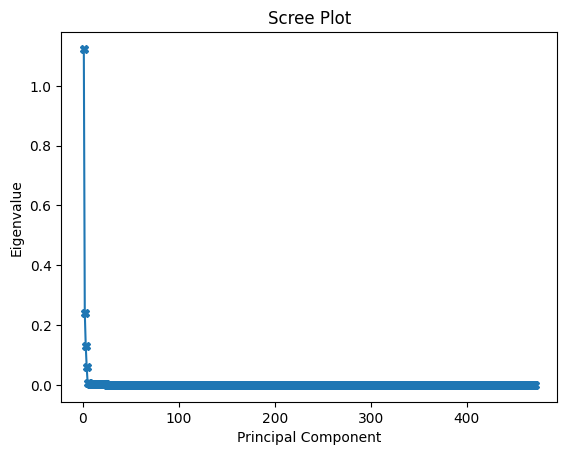

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA model
pca = PCA()
pca.fit(log_returns)



# Scree plot
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='X')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()





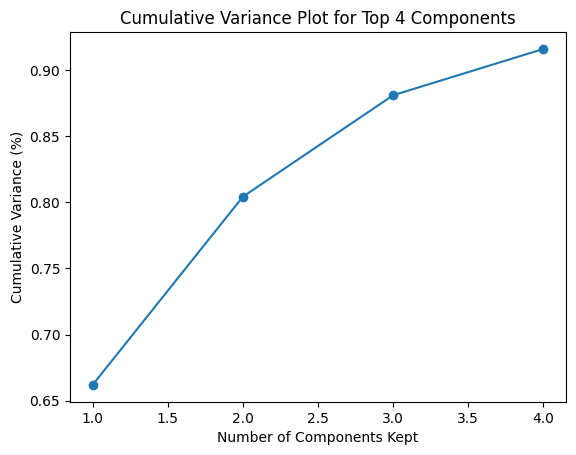

In [69]:
# Cumulative variance plot for the top 4 components
n_components_to_keep = 4
cumulative_variance_top_n = np.cumsum(pca.explained_variance_ratio_[:n_components_to_keep])

# Plotting
plt.plot(range(1, n_components_to_keep + 1), cumulative_variance_top_n, marker='o')
plt.title('Cumulative Variance Plot for Top 4 Components')
plt.xlabel('Number of Components Kept')
plt.ylabel('Cumulative Variance (%)')
plt.show()



In [70]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_to_retain = np.argmax(cumulative_variance >= 0.91) + 1

print(f"Number of components to retain 91% of the variance: {n_components_to_retain}")


Number of components to retain 91% of the variance: 4


In [71]:
# Find the number of components for 80% variance
desired_variance = 0.8
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_80_percent = np.argmax(cumulative_variance >= desired_variance) + 1
print("Number of components to capture 80% variance:", n_components_80_percent)


Number of components to capture 80% variance: 2


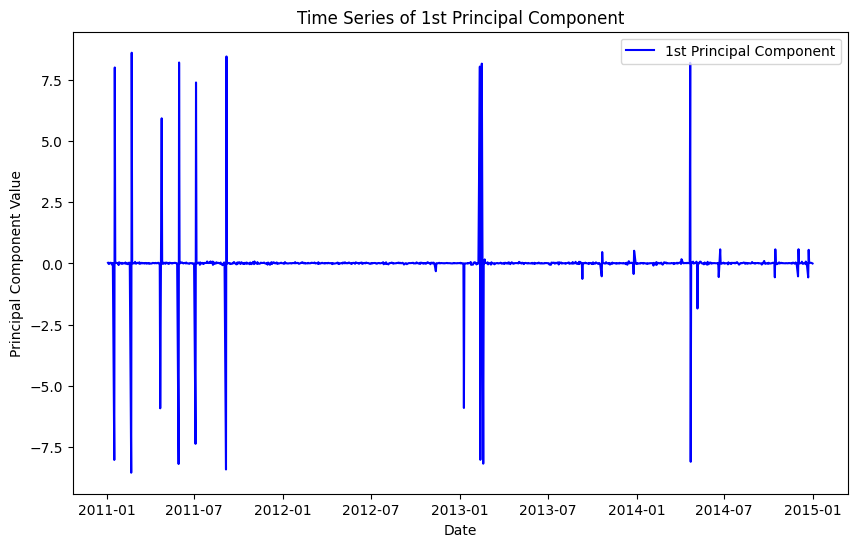

Date with the lowest value for the 1st principal component: 2011-02-21 00:00:00
Lowest value for the 1st principal component: -8.54889002497181


In [72]:
# Compute the time series of the 1st principal component
pca_components = pca.transform(log_returns)
first_principal_component = pca_components[:, 0]

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(log_returns.index, first_principal_component, label='1st Principal Component', color='blue')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()


# Find the date with the lowest value for the 1st principal component
min_value_date = log_returns.index[np.argmin(first_principal_component)]
min_value = np.min(first_principal_component)

print(f"Date with the lowest value for the 1st principal component: {min_value_date}")
print(f"Lowest value for the 1st principal component: {min_value}")


In [73]:
# Extract weights for the 1st and 2nd principal components
weights_1st_component = pca.components_[0, :]
weights_2nd_component = pca.components_[1, :]

# Display the extracted weights
print("Weights for the 1st principal component:")
print(weights_1st_component)

print("\nWeights for the 2nd principal component:")
print(weights_2nd_component)


Weights for the 1st principal component:
[-2.53432357e-04 -4.24265641e-04  7.10542751e-05 -2.84996292e-04
 -5.72619142e-04  4.83386817e-05 -3.91390757e-04 -4.58434408e-04
 -6.23355389e-04 -9.66790406e-04 -1.90161299e-04 -1.46205151e-04
 -1.15296428e-03 -1.72594136e-04 -4.68930601e-04 -6.97485914e-04
  8.32226145e-04 -2.84771634e-04 -3.45667066e-04  2.36078671e-04
  5.68257965e-06 -6.03865332e-04  1.88067208e-04 -3.60323058e-04
 -8.37719988e-04 -1.43300062e-04 -5.86539013e-04  7.48145146e-05
  4.97410488e-04 -9.91840678e-05 -2.94322931e-04 -6.50148287e-05
 -1.48893275e-04 -7.82702002e-04  3.27133183e-04  1.33951228e-03
  3.81881715e-04 -5.37882867e-04 -1.64863697e-04 -1.07117661e-03
  5.46174428e-05  1.24382506e-04 -1.18797408e-04 -2.47941669e-04
 -2.03052052e-04  2.29708495e-04 -9.27833882e-05 -1.63851552e-03
 -5.88828380e-04 -1.88967778e-04 -7.00902935e-04 -6.55419524e-04
  6.85705246e-05 -1.94994383e-04 -3.93590788e-04 -7.42994119e-05
 -4.63434178e-04 -1.60462091e-04 -2.80157170e-04 

          Weight                  Sector
ticker                                  
MMM    -0.000253             Industrials
ACE    -0.000424              Financials
ABT     0.000071             Health Care
ANF    -0.000285  Consumer Discretionary
ADBE   -0.000573  Information Technology
AMD     0.000048  Information Technology
AES    -0.000391               Utilities
AET    -0.000458             Health Care
AFL    -0.000623              Financials
A      -0.000967             Health Care


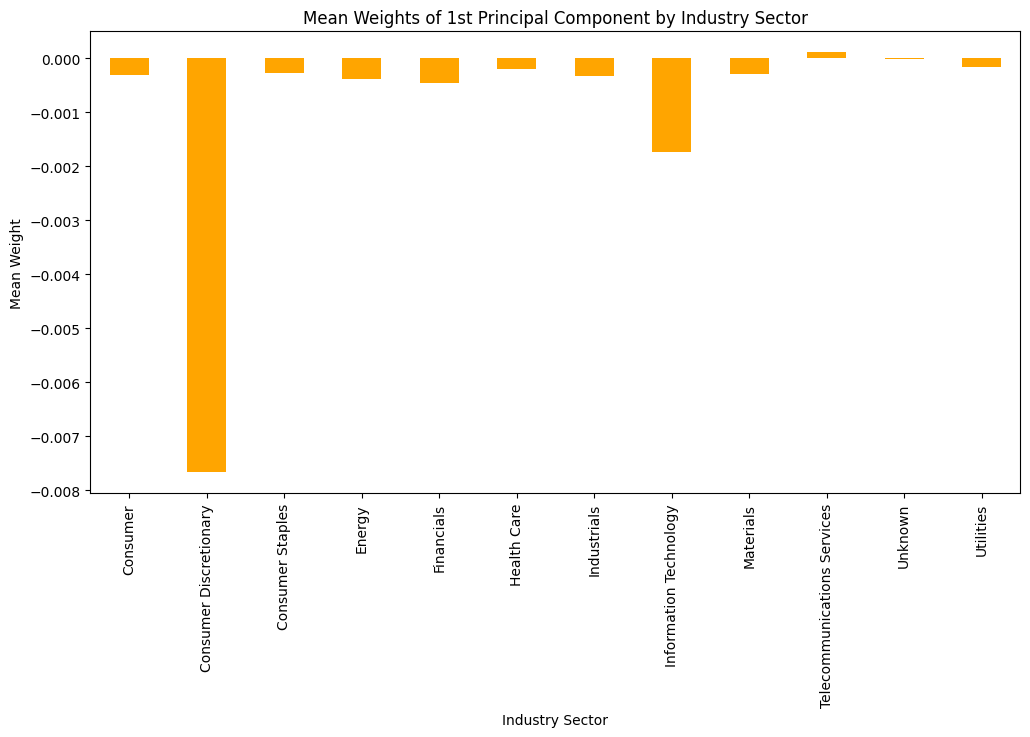

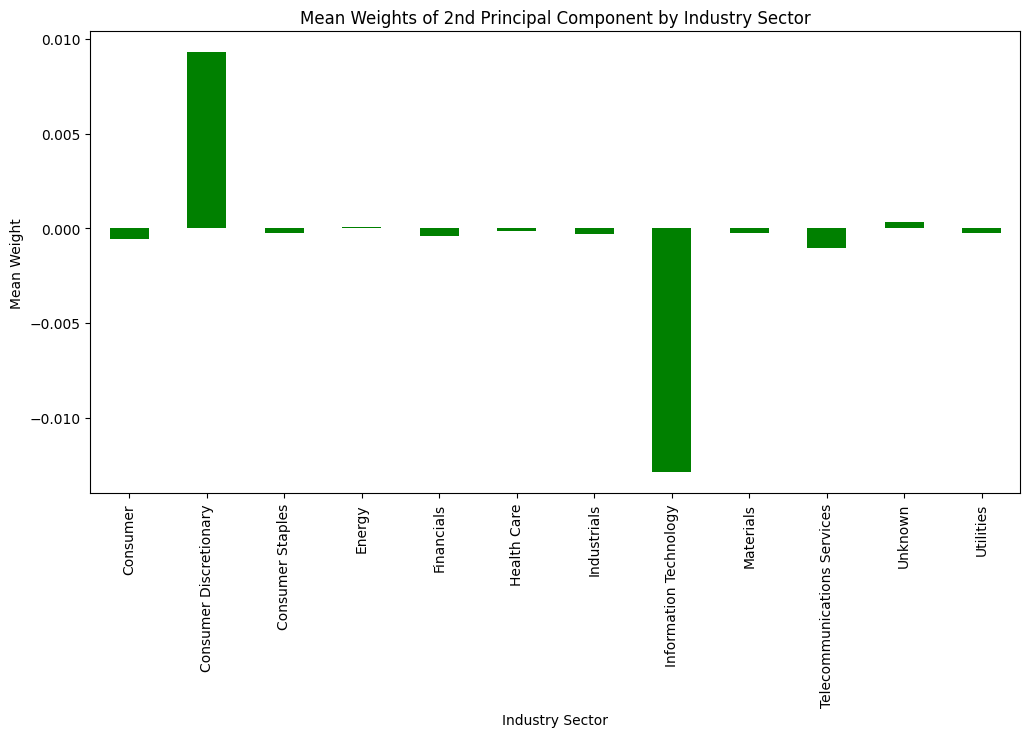

In [74]:
# Extract weights from the PCA model for 1st and 2nd principal components
weights_1st_component = pca.components_[0]
weights_2nd_component = pca.components_[1]

# Reset index of ticker_data to avoid length mismatch
ticker_data_reset = ticker_data[0:471]

# Create a plot to show weights of the 1st principal component grouped by the industry sector
weights_df = pd.DataFrame({'Weight': weights_1st_component, 'Sector': ticker_data_reset['sector'].str.strip()})

print(weights_df.head(10))
mean_weights_by_sector = weights_df.groupby('Sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_by_sector.plot(kind='bar', color='orange')
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()

# Make a similar plot for the 2nd principal component
weights_df_2nd_component = pd.DataFrame({'Weight': weights_2nd_component, 'Sector': ticker_data_reset['sector'].str.strip()})
mean_weights_by_sector_2nd = weights_df_2nd_component.groupby('Sector')['Weight'].mean()

plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd.plot(kind='bar', color='green')
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()


In [75]:
# Print the explained variance of the 1st and 2nd principal components
explained_variance_1st = pca.explained_variance_ratio_[0]
explained_variance_2nd = pca.explained_variance_ratio_[1]

print(f"Explained Variance of the 1st Principal Component: {explained_variance_1st * 100:.2f}%")
print(f"Explained Variance of the 2nd Principal Component: {explained_variance_2nd * 100:.2f}%")

# Decide which component to use based on the explained variance
if explained_variance_1st > explained_variance_2nd:
    selected_component = 1
    print("Selecting the 1st Principal Component for constructing the new stock index.")
else:
    selected_component = 2
    print("Selecting the 2nd Principal Component for constructing the new stock index.")


Explained Variance of the 1st Principal Component: 66.19%
Explained Variance of the 2nd Principal Component: 14.24%
Selecting the 1st Principal Component for constructing the new stock index.


In [76]:
import pandas as pd

# Load the data
data = pd.read_csv("BMI.csv")
X = data.drop("fatpctg", axis=1)
y = data["fatpctg"]


In [77]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Backward Stepwise Regression
backward_selector = SequentialFeatureSelector(LinearRegression(), direction='backward')
backward_selector.fit(X, y)

# Selected features
backward_selected_features = list(X.columns[backward_selector.support_])
print("Selected features (Backward Stepwise Regression):", backward_selected_features)



# Forward Stepwise Regression
forward_selector = SequentialFeatureSelector(LinearRegression(), direction='forward')
forward_selector.fit(X, y)

# Selected features
forward_selected_features = list(X.columns[forward_selector.support_])
print("Selected features (Forward Stepwise Regression):", forward_selected_features)


Selected features (Backward Stepwise Regression): ['Age', 'Weight', 'Neck', 'Abdomen', 'Thigh', 'Forearm', 'Wrist']
Selected features (Forward Stepwise Regression): ['Weight', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm']


In [78]:
# Calculate the correlation between features and the target variable
correlation_with_target = X.corrwith(y)

# Sort features based on correlation
sorted_features_by_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Display the sorted feature ranking
print("Feature Ranking based on Correlation:")
print(sorted_features_by_correlation)



Feature Ranking based on Correlation:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


In [79]:
from sklearn.linear_model import LassoCV

# Lasso Regression
lasso_selector = LassoCV(cv=5)
lasso_selector.fit(X, y)

# Selected features
lasso_selected_features = list(X.columns[lasso_selector.coef_ != 0])
print("Selected features (Lasso Regression):", lasso_selected_features)



from sklearn.ensemble import RandomForestRegressor

# Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the feature importance ranking
print("Feature Ranking based on Random Forest Feature Importance:")
print(feature_importance)


Selected features (Lasso Regression): ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Biceps', 'Forearm', 'Wrist']
Feature Ranking based on Random Forest Feature Importance:
Abdomen    0.731133
Height     0.029608
Weight     0.029277
Wrist      0.026064
Knee       0.023962
Neck       0.023246
Hip        0.022526
Age        0.022081
Thigh      0.020621
Chest      0.020474
Ankle      0.019816
Biceps     0.017122
Forearm    0.014070
dtype: float64
